Excercise Sheet 5
================

Excercise 1: Generation of Poisson spike trains
----------------------------------------------------

In the lecture we defined the rate of the stochastic process as the ratio of the number of spikes during a time intervall and this intervall:
\begin{equation}
    \nu = \frac{N_\textrm{Spikes, T}}{\Delta T}
\end{equation}
If $\langle T\rangle$ is the average ISI, then the number of spikes during a time $T$ is:
\begin{equation}
N_\text{Spikes, T} = \frac{\Delta T}{\langle T \rangle}
\end{equation}
Resulting in
\begin{equation}
\nu = \frac{1}{\langle T \rangle}
\end{equation}

The expectation value is given by:
\begin{align}
    E[N]    &= \sum_{k=0}^\infty N \frac{(\lambda t)^N}{N!}e^{-\lambda t} \\
            &= \lambda t e^{-\lambda t} \sum_{k=0}^\infty \frac{(\lambda t)^{N-1}}{(N-1)!} \\
            &= \lambda t e^{-\lambda t} e^{\lambda t} \\
            &= \lambda t
\end{align}
The variance could be calculated by using:
\begin{equation}
    Var[N] = E[N^2] - (E[N])^2
\end{equation}
Evalutating the first terme leads:
\begin{align}
    E[N^2]  &= \sum_{k=0}^\infty N^2 \frac{(\lambda t)^N}{N!}e^{-\lambda t} \\
            &= \lambda t e^{-\lambda t} \sum_{k=0}^\infty N \frac{(\lambda t)^{N-1}}{(N-1)!} \\
            &= \lambda t e^{-\lambda t} \sum_{k=0}^\infty (N+1) \frac{(\lambda t)^N}{N!} \\
            &= \lambda t e^{-\lambda t} \sum_{k=0}^\infty \left[N \frac{(\lambda t)^N}{N!} + \frac{(\lambda t)^N}{N!}\right] \\
            &= \lambda t e^{-\lambda t} \left[\lambda t e^{\lambda t} + e^{\lambda t}\right] \\
            &= (\lambda t)^2 + \lambda t
\end{align}
Putting things together:
\begin{equation}
    Var[N] = (\lambda t)^2 + \lambda t - (\lambda t)^2 = \lambda t
\end{equation}

In [26]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import numpy.random as npr
%matplotlib inline
from scipy.stats import poisson, uniform
from scipy.optimize import curve_fit
from scipy.misc import factorial

In [18]:
def poisson(k, A, lamb):
    return A*(lamb**k/factorial(k)) * np.exp(-lamb)

[ 1.  1.]


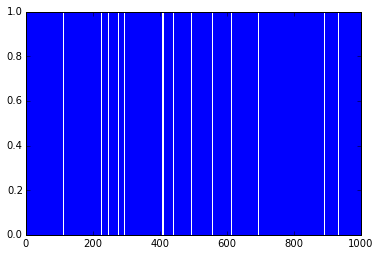

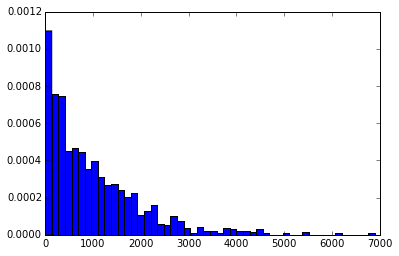

In [25]:
T = 1000
dt = 0.001
lam = 1

t = np.arange(0,T,dt)

p = npr.rand(len(t))

spike_train = t[p < lam*dt]

plt.figure()
for t_spike in spike_train:
    plt.axvline(t_spike)

data = np.diff(spike_train)/dt

plt.figure()
# the bins should be of integer width, because poisson is an integer distribution
entries, bin_edges, patches = plt.hist(data, bins=50, normed=True)

# calculate binmiddles
bin_middles = 0.5*(bin_edges[1:] + bin_edges[:-1])

# fit with curve_fit
parameters, cov_matrix = curve_fit(poisson, bin_middles, entries) 
# plot poisson-deviation with fitted parameter
#x_plot = np.linspace(1, 8000, 8000)
#plt.plot(x_plot, poisson(x_plot, 10), 'r-', lw=2)
print parameters

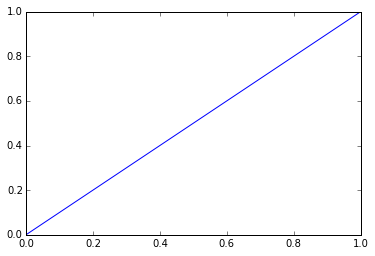

In [28]:
x = np.linspace(0,1,100)
plt.plot(x,uniform.cdf(x))

Excercise 2: High conductance state
----------------------------------------------------

Given the expression for a CUBA LIF neuron:
\begin{align}
	u(t) &= E_l + \frac{I^{\text{ext}}}{g_l} + \sum_{\text{syn }k} \sum_{\text{spk }s} \frac{\tau_k^{\text{syn}}w_k}{g_l(\tau_k^{\text{syn}} - \tau_m)} \Theta(t-t_s) \left[\exp{\left(-\frac{t-t_s}{\tau_k^{\text{syn}}}\right)} - \exp{\left(-\frac{t-t_s}{\tau_m}\right)}\right]
\end{align}
We perform the following replacements:
\begin{align}
	g_l &\rightarrow \langle g^{\text{tot}} \rangle \\
	\tau_m &\rightarrow \langle \tau_{\text{eff}} \rangle \\
	w_k &\rightarrow w_k(E_k^{\text{rev}}-\langle u_{\text{eff}}\rangle)
\end{align}
We get for the shape of a single PSP:
\begin{equation}
	\text{PSP}(t) = \frac{ \tau_k^{\text{syn}} w_k (E_k^{\text{rev}} - \langle u_{\text{eff}} \rangle)}{\langle g^{\text{tot}} \rangle (\tau_k^{\text{syn}} - \langle \tau_{\text{eff}}\rangle)} \Theta(t-t_s) \left[ \exp{\left(-\frac{t-t_s}{\tau_k^{\text{syn}}}\right)} - \exp{\left(-\frac{t-t_s}{\langle \tau_{\text{eff}} \rangle}\right)}\right]
\end{equation}
In order to obtain a closed-form solution for $\langle u_{\text{eff}}\rangle$ we consider the mean value of the total conductance. For exponential synapses the interaction kernel is given by:
\begin{equation}
	\kappa(t) = w_k \Theta(t) \exp{\left(-\frac{t}{\tau_k^{\text{syn}}}\right)}
\end{equation}
With the equations for the first moment of an additive Poisson process we get:
\begin{align}
	E[g^{\text{tot}}]  &= \sum_{k=1}^n \nu_k \int_0^\infty w_k \Theta(t) \exp{\left(-\frac{t}{\tau_k^{\text{syn}}}\right)}dt \\
                        &= \sum_{k=1}^n w_k \nu_k \tau_k^{\text{syn}}
\end{align}
Now we are able to derive an expression for $\langle u_{\text{eff}} \rangle$:
\begin{equation}
	E[u_{\text{eff}}] =  \frac{g_lE_l + I^{\text{ext}} + \sum_k w_k\nu_k\tau_k^{\text{syn}}E_k^{\text{rev}}}{g_l + \sum_k w_k\nu_k\tau_k^{\text{syn}}}
\end{equation}
The membrane potential time course of a COBA LIF neuron is given by:
\begin{equation}
	u(t) = u_{\text{eff}}^0 + \sum_{\text{syn }k} \sum_{\text{spk }s} \frac{ \tau_k^{\text{syn}} w_k (E_k^{\text{rev}} - \langle u_{\text{eff}} \rangle)}{\langle g^{\text{tot}} \rangle (\tau_k^{\text{syn}} - \langle \tau_{\text{eff}}\rangle)} \Theta(t-t_s) \left[ \exp{\left(-\frac{t-t_s}{\tau_k^{\text{syn}}}\right)} - \exp{\left(-\frac{t-t_s}{\langle \tau_{\text{eff}} \rangle}\right)}\right]
\end{equation}
with:
\begin{equation}
    u_{\text{eff}}^0 = \frac{g_l}{g^{\text{tot}}}\left(\langle u_{\text{eff}}\rangle - E_l - \frac{I^{\text{ext}}}{g_l}\right)
\end{equation}

Excercise 3: The AdEx model
-------------------------------

The ExLIF model is given by:
\begin{equation}
    C_m \frac{du}{dt} = g_l (E_l - u) + g_l\Delta_T \exp{\left(\frac{u-\theta_{rh}}{\Delta_T}\right)} + I
\end{equation}
In the limit $\Delta_T \rightarrow 0$ we only have to consider the second term:
For $u-\theta_{rh}\leq0$:
\begin{equation}
    \lim_{\Delta_T\rightarrow 0} \Delta_T \exp{\left(\frac{u-\theta_{rh}}{\Delta_T}\right)} = 0
\end{equation}
where we used de l'Hopital.
For $u-\theta_{rh}>0$:
\begin{equation}
    \lim_{\Delta_T\rightarrow 0} \Delta_T \exp{\left(\frac{u-\theta_{rh}}{\Delta_T}\right)} = \infty
\end{equation}
This can be interpreted as follows: The LIF neuron model is well defined for membrane potentials smaller or equal to the threshold. As soon as the threshold is reached the membrane potential has to be reset. This behavior is what we can observe from the limit of the ExLIF diffenrential equation being well defined for potentials smaller than the threshold, while there is a spike if the membrane potential exceeds the threshold.

The ExLIF model is given by with $u_0>\theta_{rh}$, we look at the first time step:
\begin{equation}
    C_m/g_l \frac{du}{dt} = (E_l - u_0) +\Delta_T \exp{\left(\frac{u_0-\theta_{rh}}{\Delta_T}\right)}
\end{equation}

For $u_0-\theta_{rh}=\epsilon \ll \Delta_T$ we can Taylor expand the exponential and neglect higher orders
\begin{equation}
    C_m/g_l \frac{du}{dt} = (E_l - u_0) +\Delta_T + \epsilon
\end{equation}